<a href="https://colab.research.google.com/github/alekrul/RL/blob/main/UCB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBS = [0.2, 0.5, 0.75]

In [ ]:
class Bandit:
  def __init__(self, p):
    self.p = p
    self.p_estimate = 0.
    self.N = 0

  def pull(self):
    return np.random.random() < self.p
  
  def update(self, x):
    self.N += 1
    self.p_estimate = ((self.N - 1)*self.p_estimate + x)/ self.N

In [ ]:
def ucb(mean, n, nj):
  return mean + np.sqrt(2*np.log(n)/nj) 

In [ ]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBS]
  rewards = np.empty(NUM_TRIALS)
  total_plays = 0

  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

  for i in range(NUM_TRIALS):
    j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

    rewards[i] = x
  for b in bandits:
    print("mean estimate:", b.p_estimate)
  print("total reward earned:", rewards.sum())
  print("Overall win rate:", rewards.sum()/NUM_TRIALS)
  

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) +1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBS))
  plt.show()  
  
  cumulative_average = np.cumsum(rewards)/ (np.arange(NUM_TRIALS)+1)

  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBS))
  plt.xscale('log')
  

mean estimate: 0.19444444444444442
mean estimate: 0.5239294710327458
mean estimate: 0.750437036590514
total reward earned: 74915.0
Overall win rate: 0.74915


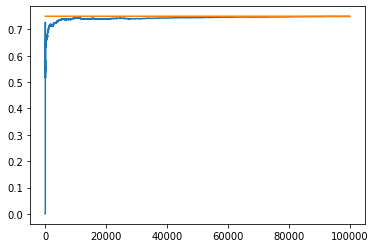

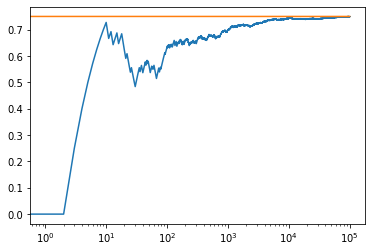

In [ ]:
experiment()